**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

In [9]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

In [10]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
import seaborn as sns
from numpy.random import default_rng

# Volatility as a function of alpha for different N (Moro 2004)

In [12]:
from lib.minority_game_vectorized import VectorizedMinorityGame

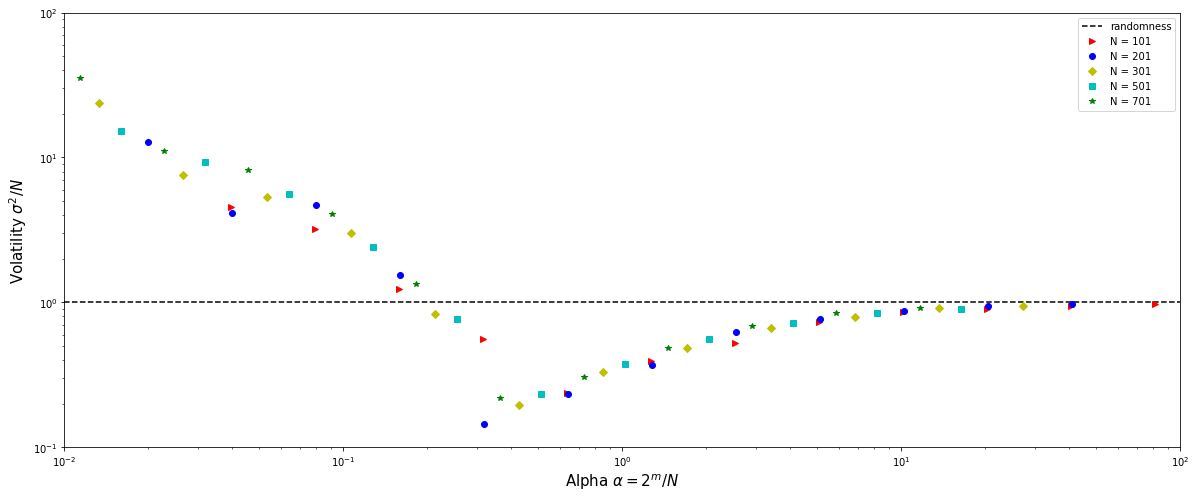

In [14]:
def n_agents_combined_graph():
    omega_graph = []
    alpha_graph = []

    N_agents = [101, 201, 301, 501, 701]
    graphs = [">r", "bo", "Dy", "sc", "*g"]

    for n_agents in N_agents:
        tot_omega = []
        tot_alpha = []

        for M in range (2,14):
            rng = default_rng(M)
            _, attendances = VectorizedMinorityGame(
                n_agents=n_agents,
                m=M,
                rng=rng
            ).simulate_game(max_steps=50000)
            # in order to create the graph
            omega = np.var(attendances)/n_agents
            alpha = 2**M/n_agents
        
            tot_omega.append(omega)
            tot_alpha.append(alpha)

        omega_graph.append(tot_omega)
        alpha_graph.append(tot_alpha)

    # everything in one graph
    fig, ax = plt.subplots(figsize=(20, 8))

    ax.axhline(y=1, color="k", linestyle="--", label="randomness") # vol = 1 -> randomness
    
    for i in range(len(graphs)):
        ax.plot(alpha_graph[i], omega_graph[i], graphs[i], label=f"N = {N_agents[i]}")

    ax.set_xlabel(r"Alpha $\alpha = 2^m/N$", fontsize=15)
    ax.set_ylabel("Volatility $\sigma^2/N$", fontsize=15)
    ax.legend()

    #plt.title("Volatilty as a function of alpha (VectorizedMG with s=2)")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([0.01, 100])
    plt.ylim([0.1, 100])
    plt.savefig("out/vol_diff_N_Moro.png", dpi = 300)
    plt.show()

n_agents_combined_graph()

# Global attendece graph (Moro 2004)

In [20]:
tot_time = []
tot_At = []
n_agents = 101

m = np.array([2,7,15])

for M in m:
    times, attendances, mean_A_t, vol_A_t = MinorityGame(
        n_agents=101,
        factory_dict={
            1: AgentFactory(
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy]
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=500)
    # in order to create the graph
    tot_time.append(times)
    tot_At.append(attendances)

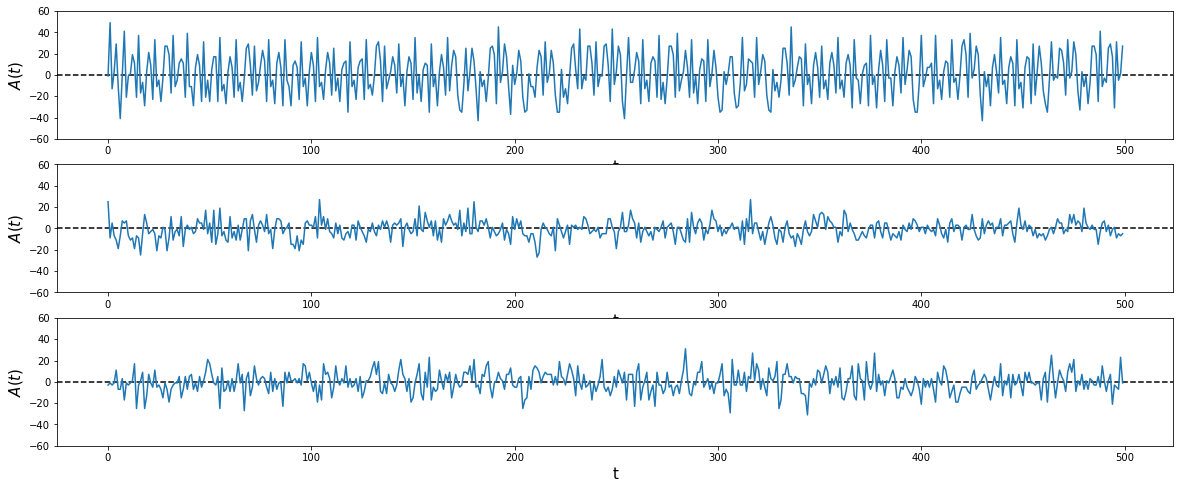

In [21]:
fig,ax = plt.subplots(3,1,figsize=(20,8))
#fig.suptitle('Action Volatility over Time', fontsize=25)

for i in range(0,3):
    ax[i].axhline(y=0, color="k", linestyle="--")
    ax[i].plot(tot_time[i], tot_At[i], label=r"$\sigma^2$")
    ax[i].set_xlabel("t",fontsize=15)
    ax[i].set_ylabel(r"$A(t)$",fontsize=15)
    ax[i].set_ylim([-60, 60])

plt.savefig("out/Attendance.png", dpi = 300)
plt.show()